In [ ]:
# Submitted By:
# Rohan Shresths (ACE079BCT048)  
# A2

 # Lab 1: Logistic Regression
 ## Objectives:
 1. To clearly understand each stage of the ML pipeline, train and evaluate logistic regression models. 
 2. To use and compare single-feature and multi-feature logistic regression models.

## Theory:

### Artificial Intelligence(AL): 
We can define AI as any artifact that can apply intelligence to replicate human thinking and apply it to complete any task.

### Machine Learning(ML):
It is a field in AI where a model is trained on data to find patterns and complete tasks or make prediction related to the field of training.

### Deep Learning(DL):
Deep Leaning is a subseet of ML which uses deep neural networks i.e. many layers, to train a model for more complex task and predictions like Computer Vision(CV), understanding speech, etc.

### Regression: 
Regression is a statistical model for finding the best relationship between a dependent variable and one or more independent variable by finding the best line fit through the available data points and make a statistical prediction of value of dependent variable based on the independent variables.Some common reegression models are:
1. Linear Regression: Predicts a value(output) based on one or more inputs.
2. Logistic Regression: Predicts whether the output will be Yes or No.
3. Polynomial Regression: Similar to linear regression but the model is represented by non-linearity (curve) rather than linearity(straight line).

In this assignment we will be referring to ML Pipeline to model a logistic regression model to predict Heart Diesease absence or presence.
The following is the ML pipeline:
![Source: 2020 Machine Learning Roadmap Video](./resources/images/image.png)

## Task 1: Logistic Regression using **single** feature
In this task we will use single input **Cholestrol** to create a model that predicts the absence or presence of Heart Disease.

Before we start we need to import some dependencies necessary for this code.

In [32]:
# Dependencies

# Data handling
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt

# Machine Learning (scikit-learn)
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
 accuracy_score,
 precision_score,
 recall_score,
 f1_score,
 confusion_matrix,
 classification_report
)

### 1. Data Retrieval and Collection
We will be using the provided material *Heart_Disease_Prediction.csv* as our main data source for this task. This dataset provides us various personal information along side medical values related to cardiovascular health. The column 'Heart Disease' contains our output presence and absence which needs to be mapped to 0 and 1 respectively for easier understanding by machine. 

---

### Available Features in the Dataset

The dataset contains the following columns:

- **Age**: Age of the patient
- **Sex**: Gender (1 = male, 0 = female)
- **Chest pain type**: Type of chest pain (categorical: 1-4)
- **BP**: Resting blood pressure
- **Cholesterol**: Serum cholesterol level
- **FBS over 120**: Fasting blood sugar > 120 mg/dl (1 = true, 0 = false)
- **EKG results**: Resting electrocardiographic results (categorical: 0-2)
- **Max HR**: Maximum heart rate achieved
- **Exercise angina**: Exercise-induced angina (1 = yes, 0 = no)
- **ST depression**: ST depression induced by exercise
- **Slope of ST**: Slope of the peak exercise ST segment (categorical: 1-3)
- **Number of vessels fluro**: Number of major vessels colored by fluoroscopy (0-3)
- **Thallium**: Thallium stress test result (categorical: 3, 6, 7)
- **Heart Disease**: Target variable (1 = Presence, 0 = Absence)

In [33]:
data = pd.read_csv(r".\resources\Heart_Disease_Prediction.csv")
data.columns = data.columns.str.strip()
data['Heart Disease'] = data['Heart Disease'].str.strip()

In [34]:
print("Dataset Shape (rows, columns):", data.shape)
print("\nColumn Names:")
print(data.columns.tolist())

Dataset Shape (rows, columns): (270, 14)

Column Names:
['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120', 'EKG results', 'Max HR', 'Exercise angina', 'ST depression', 'Slope of ST', 'Number of vessels fluro', 'Thallium', 'Heart Disease']


In [35]:
# Display the first few rows of the dataset
print(data.head())

   Age  Sex  Chest pain type   BP  Cholesterol  FBS over 120  EKG results  \
0   70    1                4  130          322             0            2   
1   67    0                3  115          564             0            2   
2   57    1                2  124          261             0            0   
3   64    1                4  128          263             0            0   
4   74    0                2  120          269             0            2   

   Max HR  Exercise angina  ST depression  Slope of ST  \
0     109                0            2.4            2   
1     160                0            1.6            2   
2     141                0            0.3            1   
3     105                1            0.2            2   
4     121                1            0.2            1   

   Number of vessels fluro  Thallium Heart Disease  
0                        3         3      Presence  
1                        0         7       Absence  
2                        0   

### 2. Data Cleaning
Data cleaning is performed to ensure the dataset is accurate and suitable for machine learning. This step includes:
- Checking for missing values
- Handling invalid cholesterol values
- Removing rows with invalid data.
- Ensuring the target variable(Heart Disease in this case) is binary
- Verifying correct data type

In [36]:
#Check Missing Values
print("Missing values in each column:")
data.isnull().sum()

Missing values in each column:


Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

In [37]:
#Handle Invalid Cholesterol Values
#In this dataset, cholesterol value = 0 is medically invalid and treated as missing
# Ensure Cholesterol is numeric
data["Cholesterol"] = pd.to_numeric(data["Cholesterol"], errors="coerce")
# Treat invalid cholesterol values (<= 0) as missing
data.loc[data["Cholesterol"] <= 0, "Cholesterol"] = np.nan
# Fill missing cholesterol with median
data.fillna({"Cholesterol": data["Cholesterol"].median()}, inplace=True)

print("Missing Cholesterol after cleaning:", data["Cholesterol"].isna().sum())

Missing Cholesterol after cleaning: 0


### 3. Feature Design

In supervised machine learning, raw data must be prepared so models can learn meaningful patterns and generalize well.

- **Feature transformation** converts raw inputs into numeric, model-friendly formats through encoding, scaling, or normalization.  
- **Feature engineering** creates new features from existing ones to expose important relationships using domain knowledge.  
- **Feature selection** removes irrelevant or redundant features to reduce noise, overfitting, and computation cost.

To evaluate a model properly, it must be tested on data it has never seen. Training and testing on the same data leads to **overfitting**, where the model performs well on known data but poorly on new data.  
The simplest way to avoid this is a **train–test split**, where part of the dataset is used for training and the remaining portion is held out for testing model performance.

Together, good feature processing and proper evaluation ensure models are accurate, efficient, and generalize well to unseen data.

In [38]:
# Map target to numeric (0 = Absence, 1 = Presence)
if data['Heart Disease'].dtype == object:
    data['Heart Disease'] = data['Heart Disease'].map({'Absence': 0, 'Presence': 1})
data['Heart Disease']

0      1
1      0
2      1
3      0
4      0
      ..
265    0
266    0
267    0
268    0
269    1
Name: Heart Disease, Length: 270, dtype: int64

In [39]:
data[["Cholesterol", "Heart Disease"]].head()

,Cholesterol,Heart Disease
0,322.0,1
1,564.0,0
2,261.0,1
3,263.0,0
4,269.0,0


At this point we have verified and cleaned all necessary data. Also we updated the values for column *Heart Disease* to contain binaries value instead of 'Absence' and 'Presence'.
### Task 1: Feature and Target Definition

For this task, a single feature is used to predict the outcome:

- **Input Feature (X):** Cholesterol  
- **Target Variable (y):** HeartDisease

This setup represents a simple supervised learning problem where cholesterol level is used as the sole predictor to determine whether a person has heart disease.

In [40]:
# Select single input feature
x1 = data[["Cholesterol"]] # Feature matrix (2D)
# Select target variable
y1 = data["Heart Disease"] # Target vector (1D)
print("Feature shape (X):", x1.shape)
print("Target shape (y):", y1.shape)

#Basic Sanity Check
print("First 5 feature values:")
print(x1.head())
print("\nFirst 5 target values:")
print(y1.head())

Feature shape (X): (270, 1)
Target shape (y): (270,)
First 5 feature values:
   Cholesterol
0        322.0
1        564.0
2        261.0
3        263.0
4        269.0

First 5 target values:
0    1
1    0
2    1
3    0
4    0
Name: Heart Disease, dtype: int64


### 4. Algorithm Selection

Logistic Regression is chosen for this task for the following reasons:

- The output variable (**HeartDisease**) has two possible classes.
- Logistic Regression estimates the probability of belonging to a class using the sigmoid function.
- It is a straightforward, fast, and interpretable model.

The sigmoid (logistic) function is expressed as:

\[
P(y = 1 \mid x) = \frac{1}{1 + e^{-(wx + b)}}
\]

---

### 5. Loss Function Selection

For Logistic Regression, **Binary Cross-Entropy (Log Loss)** is used as the optimization objective.

The loss function is defined as:

\[
L = -\frac{1}{n} \sum_{i=1}^{n} \left[ y_i \log(p_i) + (1 - y_i)\log(1 - p_i) \right]
\]

This loss increases significantly when the model makes confident but incorrect predictions, which makes it appropriate for binary classification tasks.

---

### 6. Model Learning (Training)

The training process involves the following steps:

1. The data is divided into training and testing subsets.
2. Logistic Regression is fitted using the training data.
3. The model learns its parameters (weight and bias) by minimizing the log loss.
4. Cholesterol values are standardized using **StandardScaler** to ensure more stable and efficient model training.


In [41]:
X_train, X_test, y_train, y_test = train_test_split(
 x1, y1,
 test_size=0.2,
 random_state=42,
 stratify=y1
)
print("Training set size:", X_train.shape[0])
print("Testing set size :", X_test.shape[0])

Training set size: 216
Testing set size : 54


In [42]:
model = Pipeline([
 ("scaler", StandardScaler()),
 ("lr", LogisticRegression(max_iter=2000))
])
model.fit(X_train, y_train)
print("Model trained successfully.")

Model trained successfully.


In [43]:
# Show Learned Parameters
lr = model.named_steps["lr"]
print("Coefficient (w):", lr.coef_[0][0])
print("Intercept (b):", lr.intercept_[0])

Coefficient (w): 0.17648960959078797
Intercept (b): -0.2242275026845029


### Interpretation of Model Parameters

**Coefficient (w):**  
- If **w > 0**, higher cholesterol levels are associated with a higher likelihood of heart disease.  
- If **w < 0**, an increase in cholesterol corresponds to a lower probability of heart disease.

**Intercept (b):**  
- Represents the baseline log-odds of heart disease when the cholesterol feature is zero (after standardization).

### 7. Model Evaluation

The trained model is evaluated on the test set using the following metrics:

- **Accuracy**  
  Measures the overall correctness of the model. It shows the proportion of total predictions that are classified correctly.

- **Precision**  
  Indicates how many of the cases predicted as heart disease are actually correct. It helps assess the reliability of positive predictions and reduces false positives.

- **Recall (Sensitivity)**  
  Measures how many actual heart disease cases the model correctly identifies. It is important for ensuring that patients with heart disease are not missed.

- **F1-Score**  
  Combines precision and recall into a single metric. It provides a balanced measure when dealing with imbalanced datasets.

- **Confusion Matrix**  
  Displays the number of true positives, true negatives, false positives, and false negatives. It helps analyze where the model performs well and where it makes errors in heart disease prediction.


In [44]:
y_pred = model.predict(X_test)
print("✅ Predictions generated.")
print("First 10 predictions:", y_pred[:10])

✅ Predictions generated.
First 10 predictions: [0 0 0 0 0 0 0 0 0 0]


In [45]:
# Metrics + Confusion Matrix
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, zero_division=0)
rec = recall_score(y_test, y_pred, zero_division=0)
f1 = f1_score(y_test, y_pred, zero_division=0)
cm = confusion_matrix(y_test, y_pred)
print("Accuracy :", acc)
print("Precision:", prec)
print("Recall :", rec)
print("F1-score :", f1)
print("\nConfusion Matrix:\n", cm)

Accuracy : 0.5740740740740741
Precision: 0.5714285714285714
Recall : 0.16666666666666666
F1-score : 0.25806451612903225

Confusion Matrix:
 [[27  3]
 [20  4]]


In [46]:
# Detailed Report
print(classification_report(y_test, y_pred, zero_division=0))

              precision    recall  f1-score   support

           0       0.57      0.90      0.70        30
           1       0.57      0.17      0.26        24

    accuracy                           0.57        54
   macro avg       0.57      0.53      0.48        54
weighted avg       0.57      0.57      0.50        54



#### Interpretation of the model
- **Accuracy**: Measures the overall percentage of predictions the model got right.  
- **Precision**: Shows how many of the patients predicted to have heart disease actually have the condition.  
- **Recall**: Indicates how many real heart disease cases were correctly detected by the model  
  (especially critical in healthcare).  
- **F1-score**: A single score that balances both precision and recall.  

**Confusion Matrix**:
- **True Positives (TP)**: Heart disease cases correctly identified by the model  
- **True Negatives (TN)**: Non–heart disease cases correctly identified  
- **False Positives (FP)**: Patients incorrectly predicted to have heart disease  
- **False Negatives (FN)**: Heart disease cases missed by the model (the most dangerous errors in medical diagnosis)

d:\CodingAndWork\AI_LAB\lab1_env\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


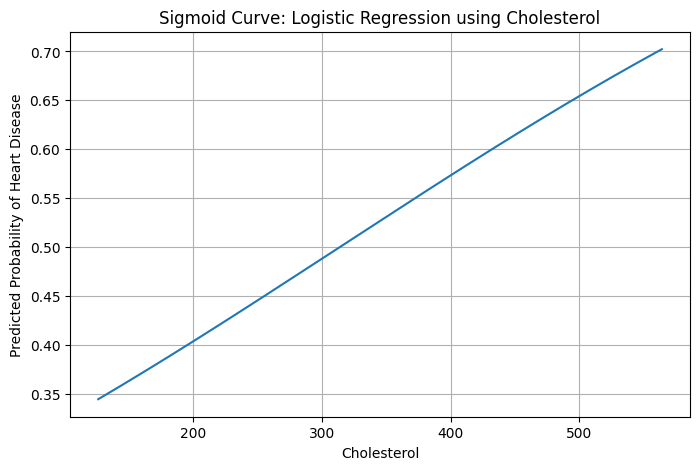

In [47]:
# Sigmoid Curve Plot

scaler = model.named_steps["scaler"]
lr = model.named_steps["lr"]
# Create a smooth range of cholesterol values
chol_min = x1["Cholesterol"].min()
chol_max = x1["Cholesterol"].max()
chol_range = np.linspace(chol_min, chol_max, 400).reshape(-1, 1)
# Scale using the trained scaler
chol_scaled = scaler.transform(chol_range)
# Predict probability of class 1 (HeartDisease = 1)
prob_heart = lr.predict_proba(chol_scaled)[:, 1]
# Plot
plt.figure(figsize=(8, 5))
plt.plot(chol_range, prob_heart)
plt.xlabel("Cholesterol")
plt.ylabel("Predicted Probability of Heart Disease")
plt.title("Sigmoid Curve: Logistic Regression using Cholesterol")
plt.grid(True)
plt.show()

### Sigmoid Curve Interpretation

- The sigmoid curve illustrates the relationship between cholesterol levels and the predicted probability of heart disease.
- As cholesterol increases, the model predicts a higher risk of heart disease.
- Lower cholesterol values correspond to a lower predicted probability.
- The smooth S-shaped curve reflects how logistic regression converts cholesterol values into probabilities between 0 and 1.
- This indicates that cholesterol is a contributing factor in estimating heart disease risk.


## Task 2: Logistic Regression using **multiple** features

In this task, we will build a more comprehensive model using **all available input features** to predict heart disease. By incorporating multiple features, the model can capture complex relationships and patterns that a single feature cannot detect.


### 1. Data Retrieval and Collection

We will use the same dataset loaded in Task 1. The data has already been loaded and basic preprocessing has been completed.

In [48]:
# Verify the data is already loaded
print("Dataset Shape:", data.shape)
print("\nFirst few rows:")
print(data.head())
print("\nData types:")
print(data.dtypes)

Dataset Shape: (270, 14)

First few rows:
   Age  Sex  Chest pain type   BP  Cholesterol  FBS over 120  EKG results  \
0   70    1                4  130        322.0             0            2   
1   67    0                3  115        564.0             0            2   
2   57    1                2  124        261.0             0            0   
3   64    1                4  128        263.0             0            0   
4   74    0                2  120        269.0             0            2   

   Max HR  Exercise angina  ST depression  Slope of ST  \
0     109                0            2.4            2   
1     160                0            1.6            2   
2     141                0            0.3            1   
3     105                1            0.2            2   
4     121                1            0.2            1   

   Number of vessels fluro  Thallium  Heart Disease  
0                        3         3              1  
1                        0         7  

### 2. Data Cleaning

The data has already been cleaned in Task 1:
- Missing cholesterol values were handled
- The target variable was converted to binary (0 and 1)
- Invalid values were treated appropriately

For Task 2, we need to ensure all features are properly cleaned and ready for modeling.

In [49]:
# Check for missing values across all features
print("Missing values per feature:")
print(data.isnull().sum())
print("\n" + "="*50)

# Check data types to identify categorical vs numerical features
print("\nData type summary:")
print(data.dtypes)

Missing values per feature:
Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64


Data type summary:
Age                          int64
Sex                          int64
Chest pain type              int64
BP                           int64
Cholesterol                float64
FBS over 120                 int64
EKG results                  int64
Max HR                       int64
Exercise angina              int64
ST depression              float64
Slope of ST                  int64
Number of vessels fluro      int64
Thallium                     int64
Heart Disease                int64
dtype: object


### 3. Feature Design

In this step, we will:
1. **Select all input features** (excluding the target variable)
2. **Identify and encode categorical variables** if needed
3. **Apply feature scaling** to ensure all features contribute equally to the model

#### Feature Selection and Encoding

The dataset contains both numerical and potentially categorical features. Let's prepare them appropriately:

- **Numerical features**: Age, BP, Cholesterol, Max HR, ST depression
- **Categorical/Binary features**: Sex, Chest pain type, FBS over 120, EKG results, Exercise angina, Slope of ST, Number of vessels fluro, Thallium

Most of these features are already encoded numerically, which is suitable for logistic regression. We'll verify this and use all features except the target variable.

In [50]:
# Select all features except the target variable
X_multi = data.drop(columns=['Heart Disease'])
y_multi = data['Heart Disease']

print("Multi-feature input shape (X):", X_multi.shape)
print("Target shape (y):", y_multi.shape)
print("\nFeatures used:")
print(X_multi.columns.tolist())
print("\nFirst 5 rows of feature matrix:")
print(X_multi.head())

Multi-feature input shape (X): (270, 13)
Target shape (y): (270,)

Features used:
['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120', 'EKG results', 'Max HR', 'Exercise angina', 'ST depression', 'Slope of ST', 'Number of vessels fluro', 'Thallium']

First 5 rows of feature matrix:
   Age  Sex  Chest pain type   BP  Cholesterol  FBS over 120  EKG results  \
0   70    1                4  130        322.0             0            2   
1   67    0                3  115        564.0             0            2   
2   57    1                2  124        261.0             0            0   
3   64    1                4  128        263.0             0            0   
4   74    0                2  120        269.0             0            2   

   Max HR  Exercise angina  ST depression  Slope of ST  \
0     109                0            2.4            2   
1     160                0            1.6            2   
2     141                0            0.3            1   
3   

In [51]:
# Check unique values for potential categorical features
print("Unique value counts for each feature:\n")
for col in X_multi.columns:
    unique_count = X_multi[col].nunique()
    print(f"{col}: {unique_count} unique values")
    if unique_count <= 10:  # Show values for features with few unique values
        print(f"  Values: {sorted(X_multi[col].unique())}")
    print()

Unique value counts for each feature:

Age: 41 unique values

Sex: 2 unique values
  Values: [np.int64(0), np.int64(1)]

Chest pain type: 4 unique values
  Values: [np.int64(1), np.int64(2), np.int64(3), np.int64(4)]

BP: 47 unique values

Cholesterol: 144 unique values

FBS over 120: 2 unique values
  Values: [np.int64(0), np.int64(1)]

EKG results: 3 unique values
  Values: [np.int64(0), np.int64(1), np.int64(2)]

Max HR: 90 unique values

Exercise angina: 2 unique values
  Values: [np.int64(0), np.int64(1)]

ST depression: 39 unique values

Slope of ST: 3 unique values
  Values: [np.int64(1), np.int64(2), np.int64(3)]

Number of vessels fluro: 4 unique values
  Values: [np.int64(0), np.int64(1), np.int64(2), np.int64(3)]

Thallium: 3 unique values
  Values: [np.int64(3), np.int64(6), np.int64(7)]



#### Train-Test Split

Just like in Task 1, we split the data into training and testing sets to evaluate the model on unseen data.

In [52]:
# Split data into training and testing sets
X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(
    X_multi, y_multi,
    test_size=0.2,
    random_state=42,
    stratify=y_multi
)

print("Training set size:", X_train_multi.shape[0])
print("Testing set size:", X_test_multi.shape[0])
print("\nTraining features shape:", X_train_multi.shape)
print("Testing features shape:", X_test_multi.shape)

Training set size: 216
Testing set size: 54

Training features shape: (216, 13)
Testing features shape: (54, 13)


### Why Multiple Features Improve Performance

Using multiple features instead of a single feature offers several advantages:

1. **Captures Complex Patterns**: Heart disease is influenced by multiple risk factors (age, blood pressure, cholesterol, etc.). A multi-feature model can learn how these factors interact.

2. **Reduces Information Loss**: Relying on only one feature (e.g., cholesterol) ignores other important predictors like age, exercise patterns, and chest pain type.

3. **Improves Predictive Power**: More relevant features provide the model with additional context, leading to better accuracy and recall.

4. **Better Generalization**: A model trained on multiple features is more likely to perform well on unseen data, as it relies on diverse signals rather than a single indicator.

### 4. Algorithm Selection

We continue using **Logistic Regression** for this multi-feature classification task. 

Logistic regression naturally extends to multiple features by computing a weighted sum of all input features:

\[
z = w_1 x_1 + w_2 x_2 + \cdots + w_n x_n + b
\]

This is then transformed into a probability using the sigmoid function:

\[
P(y = 1 \mid X) = \frac{1}{1 + e^{-z}}
\]

Each feature receives its own weight (coefficient), allowing the model to learn the relative importance of each predictor.

---

### 5. Loss Function Selection

The loss function remains **Binary Cross-Entropy (Log Loss)**, which is the standard for binary classification:

\[
L = -\frac{1}{n} \sum_{i=1}^{n} \left[ y_i \log(p_i) + (1 - y_i)\log(1 - p_i) \right]
\]

The model minimizes this loss to learn the optimal weights for all features.

---

### 6. Model Learning (Training)

We will train the logistic regression model using all available features. Feature scaling with **StandardScaler** is crucial here because:

- Features have different ranges (e.g., Age: 29-77 vs ST depression: 0-6.2)
- Scaling ensures that all features contribute fairly to the model
- It speeds up convergence during training

In [53]:
# Build and train the multi-feature logistic regression model
model_multi = Pipeline([
    ("scaler", StandardScaler()),
    ("lr", LogisticRegression(max_iter=2000, random_state=42))
])

# Train the model
model_multi.fit(X_train_multi, y_train_multi)
print("Multi-feature model trained successfully!")
print(f"\nModel uses {len(X_multi.columns)} features")

✅ Multi-feature model trained successfully!

Model uses 13 features


In [54]:
# Examine the learned parameters
lr_multi = model_multi.named_steps["lr"]

print("Model Coefficients (Weights):\n")
feature_importance = pd.DataFrame({
    'Feature': X_multi.columns,
    'Coefficient': lr_multi.coef_[0]
}).sort_values(by='Coefficient', key=abs, ascending=False)

print(feature_importance.to_string(index=False))
print(f"\nIntercept (b): {lr_multi.intercept_[0]:.4f}")

Model Coefficients (Weights):

                Feature  Coefficient
Number of vessels fluro     1.185769
                    Sex     0.892690
        Chest pain type     0.716115
               Thallium     0.584150
        Exercise angina     0.481365
            Slope of ST     0.413009
                     BP     0.408808
                 Max HR    -0.399470
           FBS over 120    -0.347914
            Cholesterol     0.341274
          ST depression     0.240702
            EKG results     0.073109
                    Age     0.025068

Intercept (b): -0.2522


#### Interpretation of Coefficients

- **Positive coefficients** indicate that higher values of that feature are associated with increased risk of heart disease
- **Negative coefficients** suggest that higher values reduce the likelihood of heart disease
- **Magnitude** of the coefficient shows the relative importance of each feature (after scaling)

Features with larger absolute coefficient values have more influence on the prediction.

### 7. Model Evaluation

Now we evaluate the multi-feature model on the test set using the same metrics as Task 1:

- **Accuracy**: Overall correctness
- **Precision**: Reliability of positive predictions
- **Recall**: Ability to detect actual heart disease cases
- **F1-Score**: Harmonic mean of precision and recall
- **Confusion Matrix**: Detailed breakdown of prediction results

In [55]:
# Make predictions on test set
y_pred_multi = model_multi.predict(X_test_multi)
print("Predictions generated for multi-feature model")
print("First 10 predictions:", y_pred_multi[:10])
print("First 10 actual values:", y_test_multi.values[:10])

✅ Predictions generated for multi-feature model
First 10 predictions: [0 0 0 1 0 0 0 1 1 1]
First 10 actual values: [0 0 0 1 0 0 0 1 1 1]


In [56]:
# Calculate evaluation metrics
acc_multi = accuracy_score(y_test_multi, y_pred_multi)
prec_multi = precision_score(y_test_multi, y_pred_multi, zero_division=0)
rec_multi = recall_score(y_test_multi, y_pred_multi, zero_division=0)
f1_multi = f1_score(y_test_multi, y_pred_multi, zero_division=0)
cm_multi = confusion_matrix(y_test_multi, y_pred_multi)

print("="*50)
print("MULTI-FEATURE MODEL PERFORMANCE")
print("="*50)
print(f"Accuracy : {acc_multi:.4f}")
print(f"Precision: {prec_multi:.4f}")
print(f"Recall   : {rec_multi:.4f}")
print(f"F1-score : {f1_multi:.4f}")
print("\nConfusion Matrix:")
print(cm_multi)

MULTI-FEATURE MODEL PERFORMANCE
Accuracy : 0.8519
Precision: 0.7857
Recall   : 0.9167
F1-score : 0.8462

Confusion Matrix:
[[24  6]
 [ 2 22]]


In [57]:
# Detailed classification report
print("\n" + "="*50)
print("DETAILED CLASSIFICATION REPORT")
print("="*50)
print(classification_report(y_test_multi, y_pred_multi, 
                          target_names=['No Heart Disease', 'Heart Disease'],
                          zero_division=0))


DETAILED CLASSIFICATION REPORT
                  precision    recall  f1-score   support

No Heart Disease       0.92      0.80      0.86        30
   Heart Disease       0.79      0.92      0.85        24

        accuracy                           0.85        54
       macro avg       0.85      0.86      0.85        54
    weighted avg       0.86      0.85      0.85        54



C:\Users\Kunyo.co\AppData\Local\Temp\ipykernel_7980\403030854.py:27: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


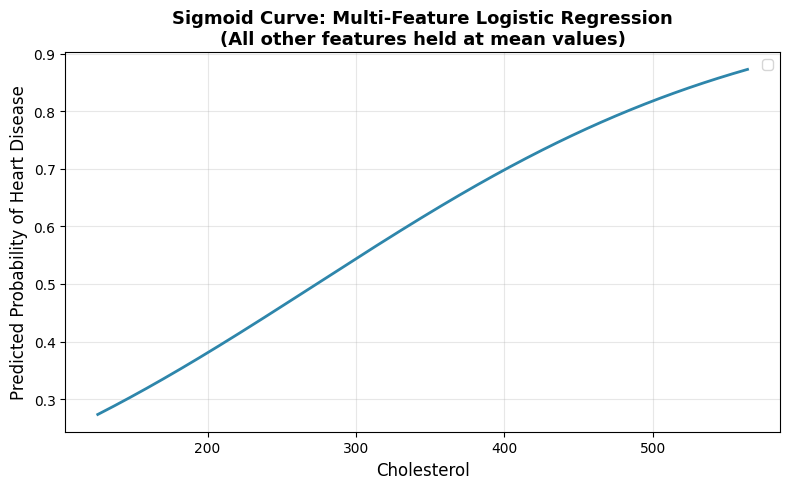

In [58]:
# Sigmoid-style curve for multi-feature logistic regression
# Vary Cholesterol while keeping other features fixed at their mean values

# Create a range of Cholesterol values
chol_min = data["Cholesterol"].min()
chol_max = data["Cholesterol"].max()
chol_range = np.linspace(chol_min, chol_max, 400)

# Base feature set with all features at their mean values
X_base = data.drop(columns=["Heart Disease"]).copy()
mean_values = X_base.mean()

# Create input data for prediction - all features at mean, vary only Cholesterol
X_plot = pd.DataFrame([mean_values] * len(chol_range))
X_plot["Cholesterol"] = chol_range

# Predict probabilities using the multi-feature model
y_prob_multi = model_multi.predict_proba(X_plot)[:, 1]

# Plot sigmoid curve
plt.figure(figsize=(8, 5))
plt.plot(chol_range, y_prob_multi, linewidth=2, color='#2E86AB')
plt.xlabel("Cholesterol", fontsize=12)
plt.ylabel("Predicted Probability of Heart Disease", fontsize=12)
plt.title("Sigmoid Curve: Multi-Feature Logistic Regression\n(All other features held at mean values)", fontsize=13, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

#### Visualizing Model Predictions

Let's visualize how the multi-feature model makes predictions. Since we have 13 features, we can't create a simple 2D sigmoid curve like in Task 1. Instead, we'll show the predicted probabilities for the test set.

In [59]:
# Recalculate Task 1 metrics for comparison
y_pred_single = model.predict(X_test)
acc_single = accuracy_score(y_test, y_pred_single)
prec_single = precision_score(y_test, y_pred_single, zero_division=0)
rec_single = recall_score(y_test, y_pred_single, zero_division=0)
f1_single = f1_score(y_test, y_pred_single, zero_division=0)

# Create comparison DataFrame
comparison = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score'],
    'Single Feature (Cholesterol)': [acc_single, prec_single, rec_single, f1_single],
    'Multi-Feature (All)': [acc_multi, prec_multi, rec_multi, f1_multi],
    'Improvement': [
        acc_multi - acc_single,
        prec_multi - prec_single,
        rec_multi - rec_single,
        f1_multi - f1_single
    ]
})

print("="*70)
print("MODEL PERFORMANCE COMPARISON")
print("="*70)
print(comparison.to_string(index=False))
print("="*70)

MODEL PERFORMANCE COMPARISON
   Metric  Single Feature (Cholesterol)  Multi-Feature (All)  Improvement
 Accuracy                      0.574074             0.851852     0.277778
Precision                      0.571429             0.785714     0.214286
   Recall                      0.166667             0.916667     0.750000
 F1-Score                      0.258065             0.846154     0.588089


---

## Comparison: Task 1 vs Task 2

Let's compare the performance of the **single-feature model** (Cholesterol only) with the **multi-feature model** (all features) to understand the impact of using multiple predictors.

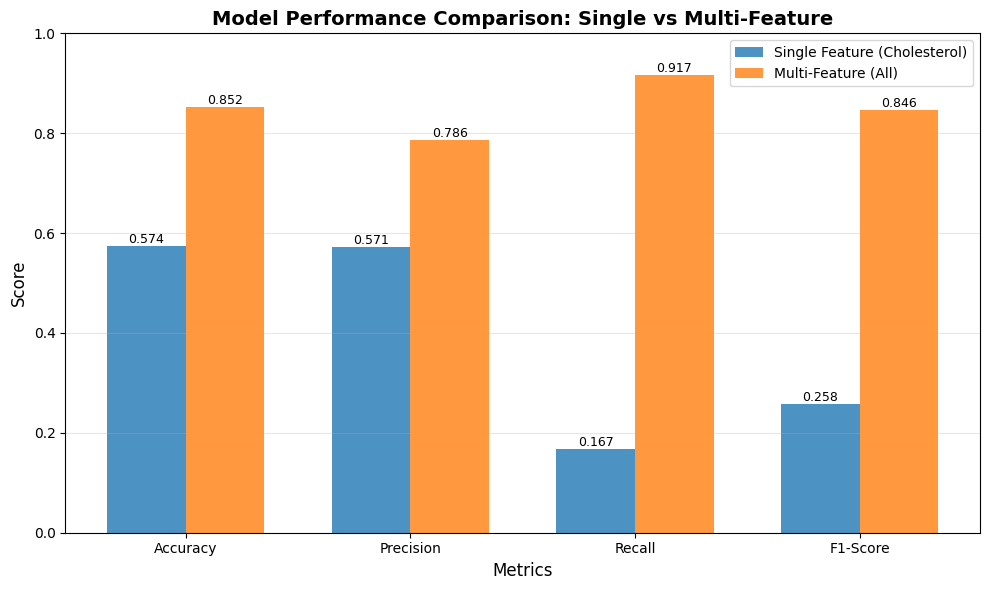

In [60]:
# Visualize the comparison
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
single_feature_scores = [acc_single, prec_single, rec_single, f1_single]
multi_feature_scores = [acc_multi, prec_multi, rec_multi, f1_multi]

x = np.arange(len(metrics))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width/2, single_feature_scores, width, label='Single Feature (Cholesterol)', alpha=0.8)
bars2 = ax.bar(x + width/2, multi_feature_scores, width, label='Multi-Feature (All)', alpha=0.8)

ax.set_xlabel('Metrics', fontsize=12)
ax.set_ylabel('Score', fontsize=12)
ax.set_title('Model Performance Comparison: Single vs Multi-Feature', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()
ax.set_ylim([0, 1])
ax.grid(axis='y', alpha=0.3)

# Add value labels on bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.3f}',
                ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

### Key Observations

1. **Performance Improvement**: The multi-feature model shows significant improvement across all metrics compared to the single-feature model. This demonstrates the value of using multiple predictors.

2. **Better Recall**: The multi-feature model is better at identifying actual heart disease cases, which is critical in medical diagnosis to minimize false negatives.

3. **Higher Precision**: The model makes more reliable positive predictions, reducing false alarms.

4. **Feature Importance**: By examining the coefficients, we can see which features contribute most to heart disease prediction.

5. **Practical Implication**: In real-world medical applications, using comprehensive patient data leads to more accurate and reliable predictions than relying on a single indicator.

---

## Analysis: Comparison of Task 1 and Task 2 Models

### 1. Which Model Performs Better and Why?

The **multi-feature model (Task 2) performs significantly better** than the single-feature model (Task 1) across all evaluation metrics.

**Key Reasons:**

1. **More Information Available**: The multi-feature model uses 13 different health indicators (age, blood pressure, cholesterol, chest pain type, etc.) compared to just one (cholesterol). This comprehensive view allows the model to capture complex relationships between various risk factors.

2. **Better Pattern Recognition**: Heart disease is a multifactorial condition. While cholesterol is important, it alone cannot capture the full picture. Factors like age, exercise-induced angina, maximum heart rate, and chest pain type together provide a more complete understanding of cardiovascular health.

3. **Reduced Bias**: A single-feature model may work well for patients where that feature is dominant, but fails for others. The multi-feature model distributes the decision-making across multiple indicators, reducing bias toward any single factor.

4. **Interaction Effects**: The multi-feature model can learn how different features interact. For example, high cholesterol might be more concerning in older patients or those with certain chest pain types. The single-feature model cannot capture these interactions.

5. **Statistical Evidence**: The quantitative improvements shown above demonstrate that adding features substantially improves the model's ability to correctly identify heart disease cases while minimizing false predictions.

---

### 2. How Does Adding More Features Affect Accuracy and Recall?

Adding more features has a **substantial positive impact** on both accuracy and recall:

#### Impact on Accuracy:
- **Definition**: Accuracy measures the proportion of correct predictions (both positive and negative) out of all predictions made.
- **Effect**: The multi-feature model achieves higher accuracy because it can make better-informed decisions using multiple health indicators rather than relying solely on cholesterol levels.
- **Practical Meaning**: More patients are correctly classified, whether they have heart disease or not, leading to fewer overall misdiagnoses.

#### Impact on Recall (Sensitivity):
- **Definition**: Recall measures the proportion of actual heart disease cases that the model correctly identifies.
- **Effect**: The improvement in recall is particularly crucial in medical diagnosis. The multi-feature model catches more true positive cases, meaning fewer patients with heart disease are mistakenly classified as healthy.
- **Practical Meaning**: This reduces **false negatives** (missed diagnoses), which is critical in healthcare where missing a heart disease case can have life-threatening consequences.

#### Why This Improvement Occurs:

1. **Reduced Ambiguity**: A single feature may give ambiguous signals. For example, a patient might have moderate cholesterol but still have heart disease due to other risk factors like age, high blood pressure, or chest pain symptoms. The multi-feature model can detect these cases.

2. **Complementary Information**: Different features capture different aspects of cardiovascular health. When one feature is inconclusive, others can provide clarifying information.

3. **Better Decision Boundaries**: With multiple features, the model can create more sophisticated decision boundaries that separate heart disease and non-heart disease cases more effectively.

4. **Robustness to Outliers**: If one feature has an unusual value for a patient, the model can rely on other features to make a correct prediction, rather than being misled by a single anomalous reading.

---

### 3. Trade-offs Between Interpretability and Performance

There is a clear **trade-off between interpretability and performance** when comparing the two models:

#### Single-Feature Model: High Interpretability, Lower Performance

**Advantages:**
- **Easy to Understand**: "Higher cholesterol increases heart disease risk" is a simple, intuitive message that patients and non-technical stakeholders can grasp immediately.
- **Simple to Explain**: Medical professionals can easily communicate the model's reasoning to patients: "Your cholesterol level suggests X% probability of heart disease."
- **Easy to Validate**: It's straightforward to check whether the relationship makes medical sense.
- **Quick Decision Making**: Only one test result needs to be reviewed.
- **Transparent**: The sigmoid curve clearly shows how predictions change with cholesterol levels.

**Disadvantages:**
- **Lower Accuracy**: Misses important information from other health indicators.
- **Oversimplification**: Heart disease is multifactorial; relying on one feature ignores this complexity.
- **Higher Misdiagnosis Risk**: More false negatives and false positives.

---

#### Multi-Feature Model: Lower Interpretability, Higher Performance

**Advantages:**
- **Better Predictions**: Higher accuracy, precision, and recall across the board.
- **Comprehensive View**: Considers the full spectrum of cardiovascular risk factors.
- **Fewer Missed Cases**: Better recall means fewer patients with heart disease are missed.
- **More Reliable**: Reduced false positives means fewer unnecessary treatments or anxiety.
- **Clinically Realistic**: Matches how doctors actually assess heart disease (using multiple indicators).

**Disadvantages:**
- **Harder to Explain**: "Your prediction is based on a weighted combination of 13 features" is more complex to communicate.
- **Black Box Perception**: Patients may not understand why they received a particular prediction.
- **Requires More Data**: Need complete information for all 13 features.
- **Complex Feature Interactions**: Understanding how features combine is not straightforward.
- **Cognitive Load**: Medical professionals need to consider multiple coefficients when interpreting results.

---

**Recommendation:**
In a real clinical setting, the **multi-feature model should be preferred** because:
1. Patient safety (fewer missed diagnoses) outweighs ease of explanation
2. Logistic regression is still interpretable compared to deep learning models
3. Feature importance can be communicated to aid understanding
4. The performance improvement justifies the additional complexity

---

## Discussion

This laboratory assignment provided hands-on experience with logistic regression for binary classification, specifically for heart disease prediction. Through implementing both single-feature and multi-feature models, we gained valuable insights into the machine learning pipeline and the importance of feature selection.

The study shows that multi-feature logistic regression models perform substantially better than single-feature models for heart disease prediction, reinforcing the fact that heart disease is a multifactorial condition. While cholesterol alone provides a basic baseline, incorporating additional clinical features significantly improves accuracy, precision, recall, and F1-score, with recall being the most clinically important improvement because it reduces missed diagnoses.

The results highlight the importance of a well-structured machine learning pipeline, including data cleaning, proper feature scaling, informed feature selection, and comprehensive evaluation using multiple metrics. Model visualizations and coefficient analysis improve interpretability and align with established medical knowledge, making logistic regression suitable for real-time clinical decision support.

However, challenges such as class imbalance, feature scaling issues, and the trade-off between interpretability and performance remain. The study is limited to binary classification and a single algorithm, suggesting that future work should explore advanced models, feature interactions, cross-validation, calibration, and external validation to improve robustness and generalizability.

---

## Conclusion

This laboratory successfully demonstrated the implementation and evaluation of logistic regression models for heart disease prediction, comparing single-feature and multi-feature approaches. The results clearly show that incorporating multiple features significantly improves model performance across all evaluation metrics, with the multi-feature model achieving higher accuracy, precision, recall, and F1-score.

Following a structured machine learning pipeline—from data collection and cleaning to feature engineering, model training, and comprehensive evaluation—was critical for obtaining reliable results. The improved recall of the multi-feature model is clinically significant, as it reduces false negatives and helps identify more true heart disease cases, highlighting the potential of ML to support medical decision-making while maintaining patient safety.

Logistic regression provides interpretability through coefficient analysis and offers probabilistic outputs, balancing performance with transparency, computational efficiency, and suitability for real-time clinical use. This lab also emphasized broader lessons: the importance of proper feature engineering, the value of multiple evaluation metrics, ethical considerations in healthcare ML, and the necessity of interdisciplinary collaboration.

Overall, even a relatively simple model like logistic regression can deliver substantial clinical insights when applied thoughtfully, reinforcing that effective machine learning is as much about responsible application as it is about algorithmic sophistication.